## 6.2 PCA (Principal Component Analysis)
### 사이킷런의 PCA 클래스
- n_components: PCA로 변환할 차원의 수

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
# 넘파이 데이터 세트를 판다스 DataFrame으로 변환
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target'] = iris.target
irisDF.head(3)
print(irisDF.shape)

(150, 5)


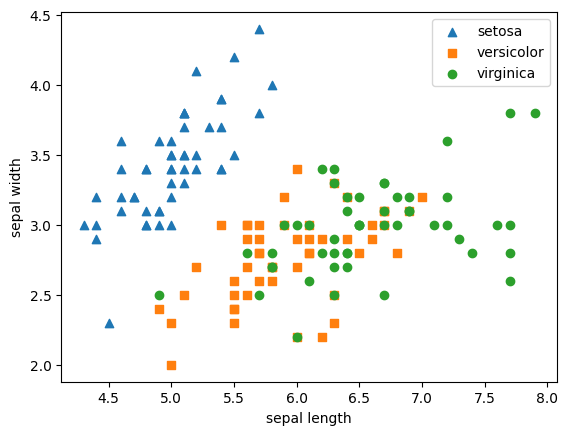

In [ ]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ['^', 's', 'o']

# setosa의 target 값은 0, versicolor는 1, verginica는 2. 각 target 별로 다른 모양으로 산점도 표시
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

- Setosa: sepal width > 3.0 & sepal lenth <= 6.0
- Versicolor, Virginica: sepal width, sepal length 만으로는 분류 불가

### PCA로 4개 속성을 2개로 압축한 뒤, 2개의 PCA 속성으로 붓꽃 데이터의 품종 분포를 2차원으로 시각화

In [ ]:
## PCA 적용 전, 개별 속성 스케일링 (여러 속성 값을 연산해야 하므로, 속성의 스케일에 영향을 받기 때문)
# 각 속성 값을 동일한 스케일로 변환

from sklearn.preprocessing import StandardScaler

# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용해 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# fit()과 transform()을 호출해 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape) # (150, 4) -> (150, 2)

(150, 2)


In [ ]:
# PCA 변환된 데이터의 칼럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns = ['pca_component_1', 'pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head(3)

pca_component_1  pca_component_2  target
0        -2.264703         0.480027       0
1        -2.080961        -0.674134       0
2        -2.364229        -0.341908       0

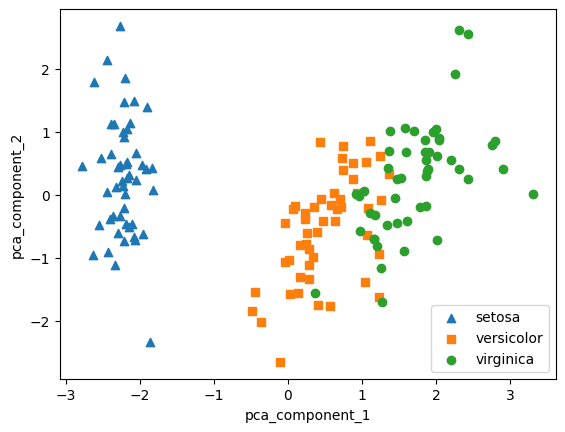

In [ ]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ['^', 's', 'o']

# pca_component_1을 x축, pca_component_2를 y축으로 scatter plot 수행
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

- Setosa: 명확하게 구분 가능
- Versicolor, Virginica: 겹치는 부분이 일부 존재하긴 하나, 비교적 잘 구분


---
✔ PCA의 첫 번째 새로운 축인 pca_component_1이 원본 데이터의 변동성을 잘 반영했기 때문


In [ ]:
## PCA Comopnent별 원본 데이터의 변동성을 얼마나 반영하고 있는지 확인
# PCA 객체의 explained_variance_ratio_ 속성: 전체 변동성에서 개별 PCA 컴포넌트별 차지하는 변동성 비율
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


- 첫 번째 PCA 변환 요소인 pca_component_1이 전체 변동성의 약 72.9%를 차지함
- 두 번째 PCQ 변환 요소인 pca_component_2는 전체 변동성의 약 22.8%를 차지함


---

✔ 따라서 PCA를 2개 요소로만 변환해도 원본 데이터의 변동성을 95% 설명할 수 있다 !

### 원본 붓꼿 데이터 세트와 PCA로 변환된 데이터 세트에 각각 분류 적용 후 결과 비교
- Estimator: RandomForestClassifier
- cross_val_score(): 3개의 교차 검증 세트로 정확도 결과 비교

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(random_state=156)
scores= cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도:', scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [ ]:
# PCA 변환된 데이터 세트에 적용
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print('PCA 변환 데이터 교차 검증 개별 정확도:', scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


- 원본 데이터 세트 대비 예측 정확도는 PCA 변환 차원 개수에 따라 예측 성능이 떨어질 수 밖에 없다.
- 8%의 정확도 하락은 비교적 큰 성능 수치 감소이지만, 4개의 속성이 2개로, 속성 개수가 50% 감소한 것을 고려하면 PCA 변환 후에도 원본 데이터의 특성을 상당 부분 유지하고 있는 것 !

### 피처 개수가 더 많은 데이터 세트에 대해 적은 PCA 컴포넌트 기반으로 변환한 뒤, 예측 영향도 비교
- Credit Card Clients Data Set
- https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

    - 30,000 records, 24 features
    - target: default payment next month (다음달 연체 여부; 연체(1), 정상납부(0))

In [ ]:
# header로 의미 없는 첫 행 제거, iloc로 기존 id 제거
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/pca_credit_card.xls', header=1, sheet_name='Data').iloc[0:, 1:]
print(df.shape)
df.head(3)

(30000, 24)


LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0      1000      1000   
2      0  ...      14331      14948      15549      1518      1500      1000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  

[3 rows x 24 columns]

In [ ]:
df.rename(columns={'PAY_0': 'PAY_1', 'default payment next month': 'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis=1)

In [ ]:
sns.heatmap?

Object `sns.heatmap` not found.


<Axes: >

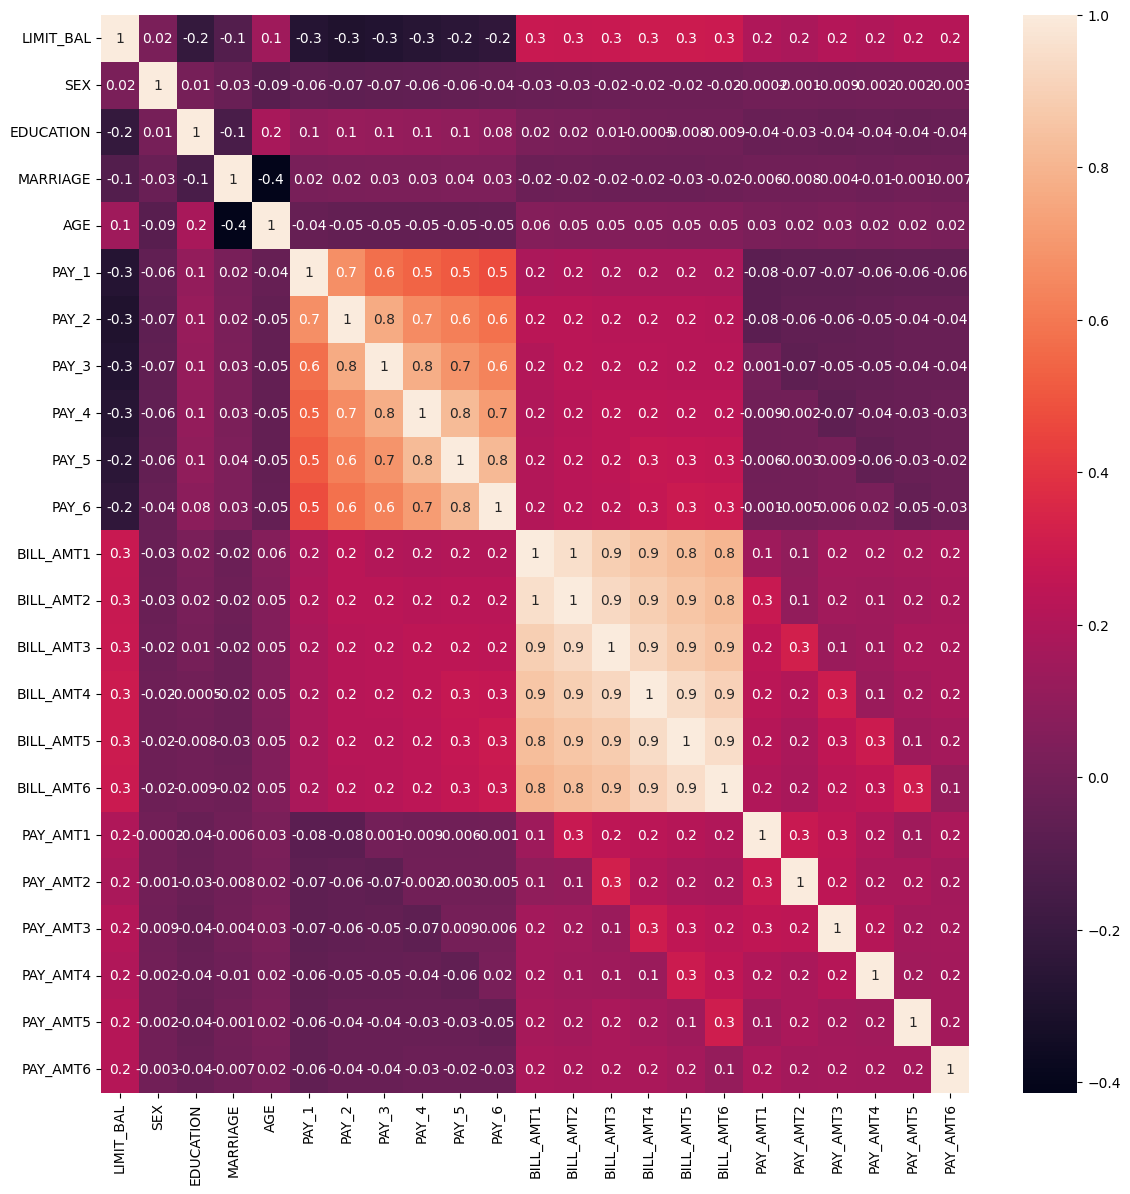

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr, annot=True, fmt='.1g') # annot=True: write the data value in each cell, fmt: String formatting code

- BILL_AMT1 ~ BILL_AMT6 6개 속성끼리의 상관도가 대부분 0.9 이상으로 매우 높음
- PAY_1 ~ PAY_6 6개 속성끼리의 상관도도 높은 편


---
✔ 높은 상관도를 가진 속성들은 소수의 PCA만으로도 자연스럽게 이 속성들의 변동성 수용 가능


### BILL_AMT1 ~ BILL_AMT6까지 6개 속성을 2개의 컴포넌트로 PCA 변환한 뒤, 개별 컴포넌트의 변동성을 확인

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# BILL_AMT1 ~ BILL_AMT6까지의 6개 속성명 생성
cols_bill = ['BILL_AMT' + str(i) for i in range(1, 7)]
print('대상 속성명', cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성 후, explained_variance_ratio_ 계산을 위해 fit() 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성:', pca.explained_variance_ratio_)

대상 속성명 ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


- 2개의 PCA 컴포넌트만으로도 6개 속성의 변동성을 약 95% 이상 설명 가능
- 특히 첫 번째 PCA 축으로 90%의 변동성을 수용할 정도로 이 6개 속성의 상관도가 매우 높음 !

### 원본 데이터 세트와 6개 컴포넌트로 PCA 변환한 데이터 세트의 분류 예측 결과 비교
- RandomForestClassifer
- cross_val_score (cv=3)

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3)

print('CV = 3인 경우의 개별 Fold세트별 정확도:', scores)
print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

CV = 3인 경우의 개별 Fold세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도: 0.8170


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터 세트에 먼저 StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개 컴포넌트를 가진 PCA 변환을 수행하고 cross_val_score()로 분류 예측 수행
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 PCA 변환된 개별 Fold 세트별 정확도:', scores_pca)
print('PCA 변환 데이터 세트 평균 정확도: {0:.4f}'.format(np.mean(scores_pca)))

CV=3 인 경우의 PCA 변환된 개별 Fold 세트별 정확도: [0.7925 0.7975 0.8022]
PCA 변환 데이터 세트 평균 정확도: 0.7974


- 전체 23개 속성의 약 1/4 수준인 6개의 PCA 컴포넌트만으로도 원본 데이터 기반 분류 예측 결과보다 약 1~2% 정도의 예측 성능 저하만 발생


---
✔ 1~2%의 예측 성능 저하를 미비한 성능 저하로 보기는 어렵지만, 전체 속성의 1/4 만으로도 이정도 예측 성능을 유지할 수 있다는 것은 PCA의 뛰어난 압축 능력을 잘 보여주는 것 !

- PCA는 차원 축소를 통해 데이터를 쉽게 인지하는데 활용할 수 있지만,
- 컴퓨터 비전 분야에서 더 활발히 적용된다 !

ex) 얼굴 인식, Eigen-face라 불리는 PCA 변환으로 원본 얼굴 이미지를 변환해 사용하는 경우 많음

## 7.3 LDA (Linear Discriminant Analysis, 선형 판별 분석법)
- PCA와 유사하게 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소하는 기법
- 지도학습의 분류에서 사용하기 쉽도록, 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소 !
- PCA (입력 데이터의 변동성의 가장 큰 축) VS. LDA (입력 데이터의 결정 값 클래스를 최대한 분리할 수 있는 축)


---

✔ 클래스 간 분산(between=class scatter)와 클래스 내부 분산(within-class scatter)의 비율을 최대화하는 방식

✔ 클래스 간 분산은 최대한 크게, 클래스 내부 분산은 최대한 작게 !



1.   클래스 내부와 클래스 간 분산 행렬을 `입력 데이터의 결정 값 클래스별 개별 피처의 평균 벡터를 기반으로` 구함
2.   두 행렬을 고유벡터로 분해
3.   고유값이 가장 큰 순으로 K개 (LDA변환 차수만큼) 추출
4.   추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환



### 붓꽃 데이터 세트에 LDA 적용
- 2개의 컴포넌트로 LDA 변환
- LDA는 PCA와 다르게 비지도 학습이 아닌, 지도학습이라는 점에 유의 ! -> 클래스의 결정 값이 변환 시에 필요

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

In [ ]:
## PCA: Target 값 제외 fit_transform

# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용해 표준 정규 분포를 가지는 값들로 변환
#iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


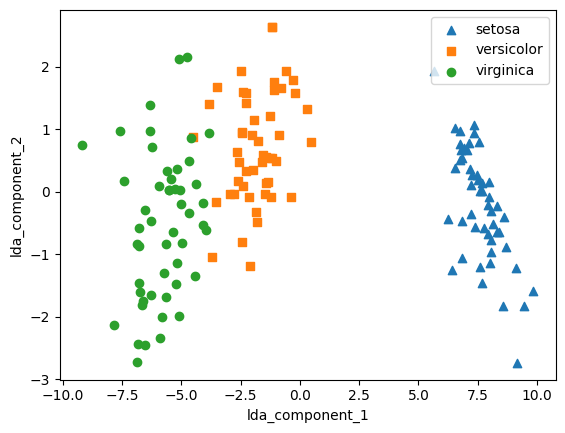

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns = ['lda_component_1', 'lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns=lda_columns)
irisDF_lda['target'] = iris.target

# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ['^', 's', 'o']

# setosa의 target 값은 0, versicolor는 1, verginica는 2. 각 target 별로 다른 모양으로 산점도 표시
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

- PCA 변환한 데이터와 좌우 대칭 형태로 많이 닮아 있음

### 7.4 SVD (Singular Value Decomposition)
- PCA의 경우, 정방행렬만을 고유벡터로 분해할 수 있지만,
- SVD는 정방행렬뿐 아니라 행과 열의 크기가 다른 m x n 행렬에도 적용 가능
- 일반적인 SVD는 넘파이나 사이파이 라이브러리를 이용해 수행 ( `numpy.linalg.svd` / `scipy.linalg.svd` )

---
✔ A(m x n) = U(m x m) sigma(m x n) V.T(n x n)
- U, V: 특이벡터 (singular vector), 모든 특이벡터는 서로 직교하는 성질을 가짐
- sigma: 대각행렬, 0이 아닌 값이 행렬 A의 특이값

cf) Compacted SVD
- 일반적으로, sigma의 대각원소 중 특이값이 0인 부분도 모두 제거하고 제거된 sigma에 대응되는 U, V 원소도 함께 저거해 차원을 줄인 형태로 SVD 적용 !


---

✔ A(m x n) = U(m x p) sigma(p x p) V.T(p x n)

cf) Truncated SVD
- sigma의 대각원소 중 상위 몇 개만 추출해 더욱 차원을 줄인 형태


---
✔ A(m x n) = U(m x r) sigma(r x r) V.T(r x n)


### 랜덤한 4 X 4 넘파이 행렬에 대해 SVD 수행
- random ? 행렬의 개별 로우끼리의 의존성을 없애기 위해 ?
- 로우 간 종속성이 크면, 대각행렬의 특이값들이 0인 경우가 많이 나오기 때문 -> 이럴 때는 Compacted SVD

In [ ]:
# 넘파이의 svd 모듈 임포트
import numpy as np
from numpy.linalg import svd

# 4 X 4 랜덤 행렬 a 생성
np.random.seed(121)
a = np.random.randn(4, 4)
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [ ]:
## numpy.linalg.svd에 파라미터로 원본 행렬 입력 시, U 행렬, Sigma 행렬, V 전치 행렬 반환
# Sigma 행렬의 경우, 행렬의 대각원소만 1차원 행렬로 표현

U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix: \n', np.round(U, 3))
print('Sigma Value: \n', np.round(Sigma, 3))
print('V transpose matrix: \n', np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix: 
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value: 
 [3.423 2.023 0.463 0.079]
V transpose matrix: 
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [ ]:
## 분해된 U, Sigma, Vt를 이용해 다시 원본 행렬로 정확히 복원되는지 확인 (U, Sigma, Vt 내적)
# Sigma의 경우 1차원으로 추출되었으므로, 다시 0을 포함한 대칭행렬로 변환한 뒤 내적 수행 !

Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


- 원본 행렬과 동일하게 복원되었음

### 데이터 세트 로우 간 의존성이 있는 경우의 SVD
- 의존성 부여: a 행렬의 3번째 로우를 '첫 번째 로우 + 두 번째 로우' / 4번째 로우는 첫 번째 로우와 같게 업데이트

In [ ]:
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [ ]:
# 다시 SVD를 수행해 Sigma 값 확인
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value: \n', np.round(Sigma, 3))

(4, 4) (4,) (4, 4)
Sigma Value: 
 [2.663 0.807 0.    0.   ]


- 이전과 차원은 같지만, Sigma 값 중 2개가 0으로 바뀌었음
- 행렬의 Ranl =2 (선형 독립인 로우 벡터의 수)

In [ ]:
## 분해된 U, Sigma, Vt를 이용해 다시 원본 행렬로 정확히 복원되는지 확인 (U, Sigma, Vt 내적)
# Sigma의 0에 대응되는 U, Sigma, Vt의 데이터를 제외하고 복원 (Compacted SVD)
# Sigma의 경우 1차원으로 추출되었으므로, 다시 0을 포함한 대칭행렬로 변환한 뒤 내적 수행 !

# U 행렬의 경우, Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2, :]
print(U_.shape, Sigma_.shape, Vt_.shape)

(4, 2) (2, 2) (2, 4)


In [ ]:
# U, Sigma, Vt의 내적을 수행하여 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_, Sigma_), Vt_)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


- 원본 행렬과 동일하게 복원됨

### Truncated SVD를 이용해 행렬 분해
- 특이값 중 상위 일부 데이터만 추출해 분해하는 방식
- 인위적으로 더 작은 차원의 U, Sigma, Vt로 분해하므로 원본 행렬을 정확하게 다시 복원할 수 는 없음
- 그러나, 데이터의 정보가 압축되어 분해됨에도 상당한 수준으로 원본 행렬을 근사할 수 있다 !
- 사이파이 모듈 ( `scipy.sparse.linalg.svds` )


---

#### 임의의 6 X 6 행렬을 Normal SVD로 분해해 결과 확인 후, 다시 Truncated SVD로 분해

In [ ]:
# np.random.random
# Return random floats in the half-open interval [0.0, 1.0)

# scipy.linalg.svd
# full_matrices = True : U(m x m) Vt(n x n)
# False : U(m x k) Vt(k x n) where k = min(m, n)

In [ ]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고 SVD를 적용할 경우 U, Sigma, Vt의 차원 확인
np.random.seed(121)
matrix = np.random.random((6, 6))
print('원본 행렬: \n', matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:', U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)

원본 행렬: 
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]


In [ ]:
# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr) # output of Truncated SVD

print('\nTruncated SVD로 분해 후 복원 행렬: \n', matrix_tr)


Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬: 
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 0.6740867  0.73812389]
 [0.59726589 0.47953891 0.56613544 0.80746028 0.13135039 0.03479656]]


- 완벽하게 복원하지 않고, 근사적으로 복원되었음

### 사이킷런 TruncatedSVD 클래스를 이용한 변환
- `scipy.sparse.linalg.svds`와 같이 Truncated SVD 연산을 수행 X !
- PCA 클래스와 유사하게 fit(), transform() 호출해 원본 데이터를 Truncated SVD의 K 컴포넌트 수로 차원을 축소해 변환
- 원본 데이터를 Truncated SVD 방식으로 분해된 U @ Sigma 행렬에 선형 변환해 생성

In [ ]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data

# 2개의 주요 컴포넌트로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)
iris_tsvd[:10]

array([[5.91274714, 2.30203322],
       [5.57248242, 1.97182599],
       [5.44697714, 2.09520636],
       [5.43645948, 1.87038151],
       [5.87564494, 2.32829018],
       [6.47759822, 2.32464996],
       [5.5159752 , 2.07090423],
       [5.85092859, 2.14807482],
       [5.15891972, 1.77506408],
       [5.64500117, 1.99000106]])

Text(0, 0.5, 'pca_component_2')

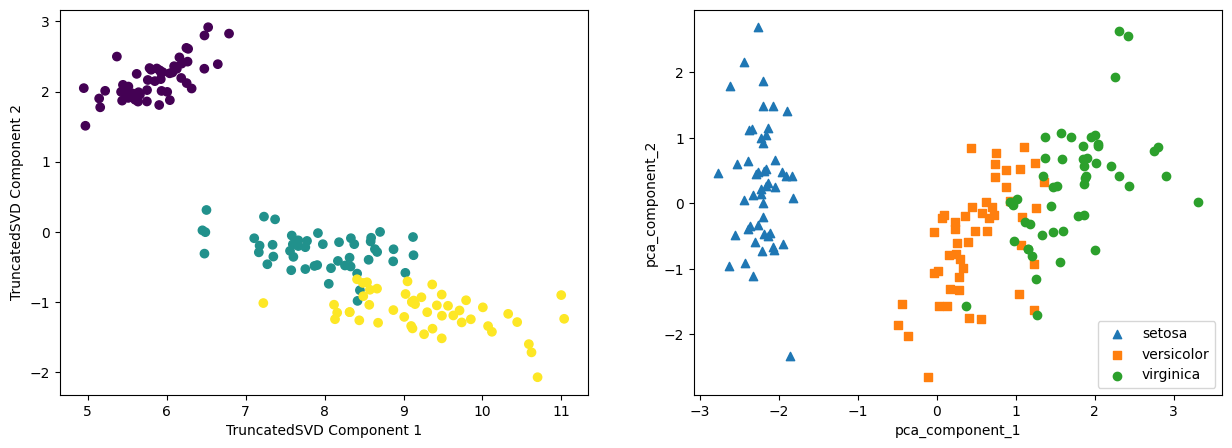

In [ ]:
plt.figure(figsize = (15, 5)) # 전체 figure 크기

# 산점도 2차원으로 TruncatedSVD 변환된 데이터 표현. 품종은 색깔로 구분
plt.subplot(1, 2, 1)
plt.scatter(x=iris_tsvd[:, 0], y=iris_tsvd[:, 1], c=iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

# 비교를 위해 PCA로 변환된 결과
markers = ['^', 's', 'o']

# pca_component_1을 x축, pca_component_2를 y축으로 scatter plot 수행
plt.subplot(1, 2, 2)
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')

- TruncatedSVD 변환 역시 PCA와 유사하게 변환
- 품종별 어느 정도 클러스터링이 가능할 정도로 각 변환 속성으로 뛰어난 고유성을 가지고 있음


---

✔ 사이킷런의 TruncatedSVD와 PCA 클래스 구현을 들여다보면, 모두 SVD를 이용해 행렬을 분해함

✔ 때문에 붓꽃 데이터를 스케일링으로 변환 후 TruncatedSVD와 PCA 클래스 변환을 해보면 두 개가 거의 동일함 !

Text(0.5, 1.0, 'PCA Transformed')

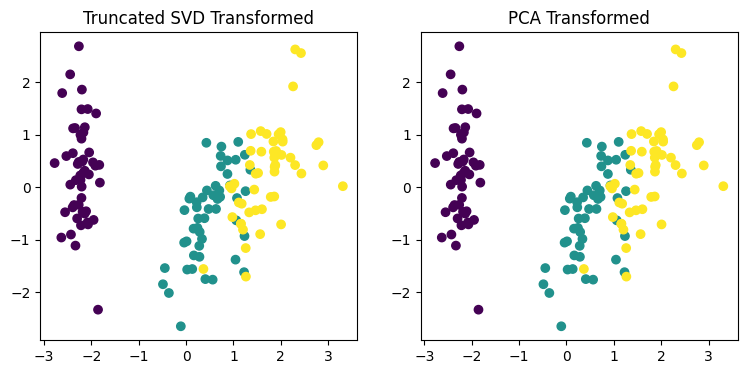

In [ ]:
from sklearn.preprocessing import StandardScaler

# 붓꼿 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA 변환 데이터를 오른쪽에 표현
fig, (ax1, ax2) = plt.subplots(figsize=(9, 4), ncols=2)
ax1.scatter(x=iris_tsvd[:, 0], y=iris_tsvd[:, 1], c=iris.target)
ax2.scatter(x=iris_pca[:, 0], y=iris_pca[:, 1], c=iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

## 바로 위의 그래프는 TruncatedSVD는 스케일링 X

In [ ]:
print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())

2.3417957388064774e-15
6.938893903907228e-18


- 두 개의 변환 행렬 값과 원본 속성별 컴포넌트 비율값을 비교한 결과, 모두 0에 가까운 값이므로 2개 변환이 서로 동일함을 알 수 있음
- 데이터 세트가 스케일링으로 데이터 중심이 동일해지면, 사이킷런의 PCA와 SVD는 동일한 변환을 수행함 !


---

✔ PCA가 SVD 알고리즘으로 구현됐음을 의미

✔ 그러나, PCA는 밀집 행렬에 대한 변환만 가능하고 SVD는 회소 행렬에 대한 변환도 가능하다 !


---

- 밀집 행렬 (Dense Matrix): 원/전체 공간에 비해 데이터가 있는 공간이 빽빽하게 차 있는 데이터 > 행렬의 값 중 0이 거의 없어야 함
- 회소 행렬 (Sparse Matrix): 차원/전체 공간에 비해 데이터가 있는 공간이 매우 협소한 데이터





## 7.5 NMF (Non-Negative Matrix Factorization)
- Truncated SVD와 같이 낮은 랭크를 통한 행렬 근사 방식의 변형
- `원본 행렬 내의 모든 원소 값이 모두 양수라는 게 보장되면` 두 개의 기반 양수 행렬로 분해할 수 있는 기법
- 차원 축소를 통한 잠재 요소 도출로 이미지 변환 및 압축, 텍스트의 토픽 도출, 영화 추천과 같은 추천 등의 영역에서 사용
    - [추천; 잠재 요소(Latent Factoring) 기반의 추천 방식]
    
    사용자의 상품 평가 데이터 세트인 사용자-평가 순위(user-Rating) 데이터 세트를 행렬 분해 기법을 통해 분해하여 사용자가 평가하지 않은 상품에 대한 잠재적인 요소를 추출해 이를 통해 평가 순위(Rating)를 예측하고, 높은 순위로 예측된 상품을 추천해주는 방식
- 사이킷런 NMF 클래스를 통해 지원

---
✔ V(4 x 6) ~= W(4 x 2) X H(2 x 6)

- 행렬 분해 (Matrix Factorization)를 하게 되면, 일반적으로 길고 가는 행렬 W, 작고 넓은 행렬 H로 분해된다

✔ 이렇게 분해된 행렬은 잠재 요소를 특성으로 가짐 !
- 분해 행렬 W: 원본 행에 대해 이 잠재 요소의 값이 얼마나 되는지
- 분해 행렬 H: 이 잠재 요소가 원본 열(즉, 원본 속성)로 어떻게 구성됐는지

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Text(0, 0.5, 'NMF Component 2')

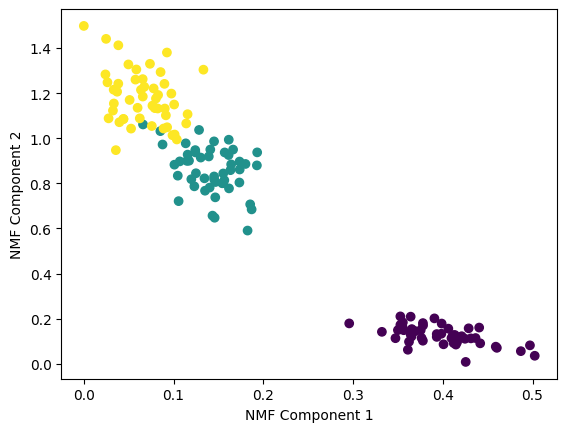

In [ ]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)

plt.scatter(x=iris_nmf[:, 0], y=iris_nmf[:, 1], c=iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')